In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
df = pd.read_csv('/content/_All_Cities_Cleaned.csv')
df.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
0,OWNER,2,BHK,Independent Floor,kamakshipalya,20000,1140,Semi-Furnished,2,Bangalore
1,OWNER,2,BHK,Independent House,Kadugodi Industrial Area,8000,840,Semi-Furnished,2,Bangalore
2,OWNER,2,BHK,Independent House,Koramangala,21000,1000,Semi-Furnished,2,Bangalore
3,OWNER,1,BHK,Apartment,Sadduguntepalya,9000,550,Semi-Furnished,1,Bangalore
4,OWNER,3,BHK,Apartment,Chandapura,17000,1230,Furnished,3,Bangalore


In [ ]:
df.shape

(31730, 10)

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20166 entries, 0 to 31729
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   seller_type    20166 non-null  object
 1   bedroom        20166 non-null  int64 
 2   layout_type    20166 non-null  object
 3   property_type  20166 non-null  object
 4   locality       20166 non-null  object
 5   price          20166 non-null  int64 
 6   area           20166 non-null  int64 
 7   furnish_type   20166 non-null  object
 8   bathroom       20166 non-null  int64 
 9   city           20166 non-null  object
dtypes: int64(4), object(6)
memory usage: 1.7+ MB


In [ ]:
df["price"]=np.log(df["price"])
df["area"]=np.log(df["area"])

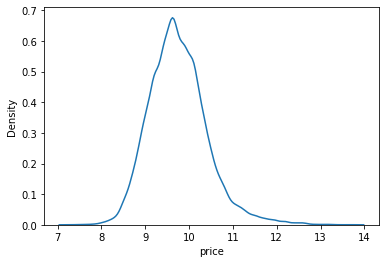

In [ ]:
sns.kdeplot(df["price"])

In [ ]:

label_encoder = preprocessing.LabelEncoder()
df['seller_type']= label_encoder.fit_transform(df['seller_type'])
df['seller_type'].unique()


array([2, 0, 1])

In [ ]:
df['layout_type']= label_encoder.fit_transform(df['layout_type'])
df['layout_type'].unique()

array([0, 1])

In [ ]:
df['property_type']= label_encoder.fit_transform(df['property_type'])
df['property_type'].unique()

array([1, 2, 0, 4, 5, 3])

In [ ]:
df['furnish_type']= label_encoder.fit_transform(df['furnish_type'])
df['furnish_type'].unique()

array([1, 0, 2])

In [ ]:
df['city']= label_encoder.fit_transform(df['city'])
df['city'].unique()

array([0, 1])

In [ ]:
df.drop("locality",axis=1,inplace=True)

In [ ]:
X=df.drop("price",axis=1)
y=df["price"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)
print("Linear Regression Training Accuracy:", model.score(X_train,y_train))
print("Linear Regression Testing Accuracy:", model.score(X_test,y_test))

Linear Regression Training Accuracy: 0.7351320699699828
Linear Regression Testing Accuracy: 0.7161099542795377


In [ ]:
model=RandomForestRegressor()
model.fit(X_train,y_train)
print("Random Forest Training Accuracy:", model.score(X_train,y_train))
print("Random Forest Testing Accuracy:", model.score(X_test,y_test))

Random Forest Training Accuracy: 0.87109465757927
Random Forest Testing Accuracy: 0.7357114367685559


In [ ]:
model=DecisionTreeRegressor()
model.fit(X_train,y_train)
print("Decision Tree Training Accuracy:", model.score(X_train,y_train))
print("Decision Tree Testing Accuracy:", model.score(X_test,y_test))

Decision Tree Training Accuracy: 0.8830985858952765
Decision Tree Testing Accuracy: 0.6758202568435501


In [ ]:
model=GradientBoostingRegressor()
model.fit(X_train,y_train)
print("Gradient Boost Training Accuracy:", model.score(X_train,y_train))
print("Gradient Boost Testing Accuracy:", model.score(X_test,y_test))

Gradient Boost Training Accuracy: 0.7788386511916461
Gradient Boost Testing Accuracy: 0.7559757697770955


In [ ]:
def evaluate(model):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    print('MAE:', mean_absolute_error(y_test, pred))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))
    print('R2 Score:', r2_score(y_test, pred))

In [ ]:
evaluate(LinearRegression())

MAE: 0.2656830997933652
RMSE: 0.3564459301812312
R2 Score: 0.7161099542795377


In [ ]:
evaluate(RandomForestRegressor())

MAE: 0.2501182757577712
RMSE: 0.34297029593179146
R2 Score: 0.7371694400536826


In [ ]:
evaluate(DecisionTreeRegressor())

MAE: 0.26810029207873826
RMSE: 0.37744245471799975
R2 Score: 0.6816796966789628


In [ ]:
evaluate(GradientBoostingRegressor())

MAE: 0.2453964352393534
RMSE: 0.3305682585496696
R2 Score: 0.7558340251625538


In [ ]:
feature_importances=pd.DataFrame(model.feature_importances_,index=X_train.columns,columns=['importance']).sort_values('importance')
feature_importances

,importance
city,0.003413
layout_type,0.003601
furnish_type,0.017505
property_type,0.024889
bathroom,0.060054
seller_type,0.061432
bedroom,0.210260
area,0.618846


In [ ]:
X = pd.DataFrame(df,columns=['area','bedroom','seller_type','property_type','furnish_type'])
y = df['price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)
print("Linear Regression Training Accuracy:", model.score(X_train,y_train))
print("Linear Regression Testing Accuracy:", model.score(X_test,y_test))

Linear Regression Training Accuracy: 0.725275870658828
Linear Regression Testing Accuracy: 0.7186567988847445


In [ ]:
m=model.predict(X_test)

(array([ 11.,  13.,  20.,  42., 109., 200., 251., 355., 477., 493., 384.,
        422., 440., 179., 311., 140.,  69.,  31.,  27.,  26.,  11.,   8.,
          9.,   2.,   0.,   1.,   1.,   0.,   1.,   1.]),
 array([ 8.0756978 ,  8.23717811,  8.39865843,  8.56013875,  8.72161906,
         8.88309938,  9.0445797 ,  9.20606001,  9.36754033,  9.52902065,
         9.69050096,  9.85198128, 10.0134616 , 10.17494191, 10.33642223,
        10.49790255, 10.65938286, 10.82086318, 10.9823435 , 11.14382381,
        11.30530413, 11.46678445, 11.62826476, 11.78974508, 11.9512254 ,
        12.11270571, 12.27418603, 12.43566635, 12.59714666, 12.75862698,
        12.9201073 ]),
 <a list of 30 Patch objects>)

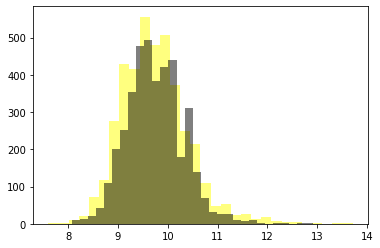

In [ ]:
plt.hist(y_test,bins=30,alpha=0.5,color='yellow')
plt.hist(m,bins=30,alpha=0.5,color='black')

In [ ]:
model=RandomForestRegressor()
model.fit(X_train,y_train)
print("Random Forest Training Accuracy:", model.score(X_train,y_train))
print("Random Forest Testing Accuracy:", model.score(X_test,y_test))

Random Forest Training Accuracy: 0.8416002316435944
Random Forest Testing Accuracy: 0.739887228510564


In [ ]:
m=model.predict(X_test)
kwargs=dict(bins=30,alpha=0.5)

(array([  1.,   3.,   2.,  11.,  60., 120., 232., 307., 445., 546., 431.,
        410., 503., 254., 234., 165., 100.,  62.,  31.,  34.,  20.,  24.,
         10.,   6.,   3.,   3.,   8.,   3.,   3.,   3.]),
 array([ 7.90945197,  8.07603436,  8.24261675,  8.40919915,  8.57578154,
         8.74236393,  8.90894632,  9.07552871,  9.24211111,  9.4086935 ,
         9.57527589,  9.74185828,  9.90844067, 10.07502307, 10.24160546,
        10.40818785, 10.57477024, 10.74135263, 10.90793503, 11.07451742,
        11.24109981, 11.4076822 , 11.57426459, 11.74084699, 11.90742938,
        12.07401177, 12.24059416, 12.40717655, 12.57375895, 12.74034134,
        12.90692373]),
 <a list of 30 Patch objects>)

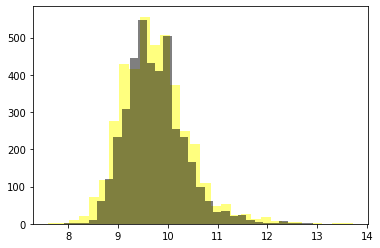

In [ ]:
plt.hist(y_test,color='yellow',**kwargs)
plt.hist(m,color='black',**kwargs)

In [ ]:
model=DecisionTreeRegressor()
model.fit(X_train,y_train)
print("Decision Tree Training Accuracy:", model.score(X_train,y_train))
print("Decision Tree Testing Accuracy:", model.score(X_test,y_test))

Decision Tree Training Accuracy: 0.8500015942636275
Decision Tree Testing Accuracy: 0.7077047189529059


In [ ]:
m=model.predict(X_test)

(array([  1.,   0.,   0.,   0.,   5.,   5.,  28.,  98., 292., 343., 540.,
        625., 402., 620., 299., 299., 193.,  76.,  73.,  49.,  25.,  19.,
         13.,   6.,   5.,   5.,   5.,   4.,   2.,   2.]),
 array([ 7.31322039,  7.50685849,  7.70049659,  7.89413469,  8.08777279,
         8.28141089,  8.47504899,  8.66868708,  8.86232518,  9.05596328,
         9.24960138,  9.44323948,  9.63687758,  9.83051568, 10.02415378,
        10.21779188, 10.41142998, 10.60506808, 10.79870618, 10.99234428,
        11.18598238, 11.37962048, 11.57325858, 11.76689668, 11.96053478,
        12.15417288, 12.34781098, 12.54144908, 12.73508718, 12.92872528,
        13.12236338]),
 <a list of 30 Patch objects>)

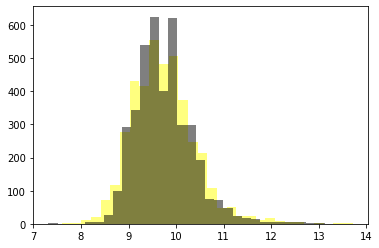

In [ ]:
kwargs=dict(bins=30,alpha=0.5)
plt.hist(y_test,color='yellow',**kwargs)
plt.hist(m,color='black',**kwargs)

In [ ]:
model=GradientBoostingRegressor()
model.fit(X_train,y_train)
print("Gradient Boost Training Accuracy:", model.score(X_train,y_train))
print("Gradient Boost Testing Accuracy:", model.score(X_test,y_test))

Gradient Boost Training Accuracy: 0.7744409352510925
Gradient Boost Testing Accuracy: 0.7557832285740123


In [ ]:
m=model.predict(X_test)
kwargs=dict(bins=30,alpha=0.5)

(array([  3.,   9.,  18.,  54., 139., 219., 294., 401., 528., 380., 333.,
        361., 415., 252., 186., 118., 106.,  39.,  39.,  38.,  20.,  22.,
         12.,  23.,   5.,   1.,   1.,   1.,  10.,   7.]),
 array([ 8.24804375,  8.39152392,  8.53500409,  8.67848426,  8.82196443,
         8.9654446 ,  9.10892478,  9.25240495,  9.39588512,  9.53936529,
         9.68284546,  9.82632564,  9.96980581, 10.11328598, 10.25676615,
        10.40024632, 10.5437265 , 10.68720667, 10.83068684, 10.97416701,
        11.11764718, 11.26112735, 11.40460753, 11.5480877 , 11.69156787,
        11.83504804, 11.97852821, 12.12200839, 12.26548856, 12.40896873,
        12.5524489 ]),
 <a list of 30 Patch objects>)

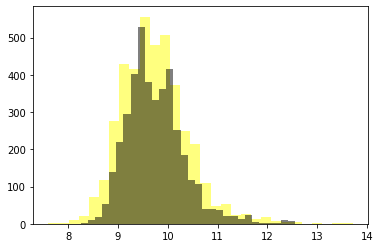

In [ ]:
plt.hist(y_test,color='yellow',**kwargs)
plt.hist(m,color='black',**kwargs)

In [ ]:
evaluate(LinearRegression())

MAE: 0.2622711286152983
RMSE: 0.35171602801478496
R2 Score: 0.7186567988847445


In [ ]:
evaluate(RandomForestRegressor())

MAE: 0.2485954634961946
RMSE: 0.3380113878030018
R2 Score: 0.740154757975442


In [ ]:
evaluate(DecisionTreeRegressor())

MAE: 0.2597731315862632
RMSE: 0.35717989302929626
R2 Score: 0.7098476379624388


In [ ]:
evaluate(GradientBoostingRegressor())

MAE: 0.24293004885609892
RMSE: 0.3276807514725634
R2 Score: 0.7557953290682455
